In [10]:
from datetime import datetime
%run function_and_library.ipynb
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

<ipython-input-15-e96c69490cdc>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


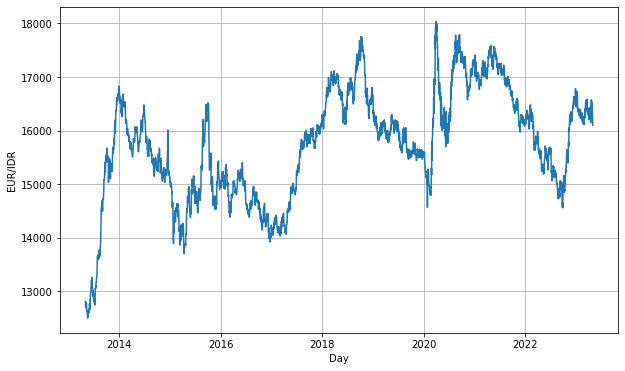

1/1 [==============================] - 0s 26ms/step


<ipython-input-15-e96c69490cdc>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


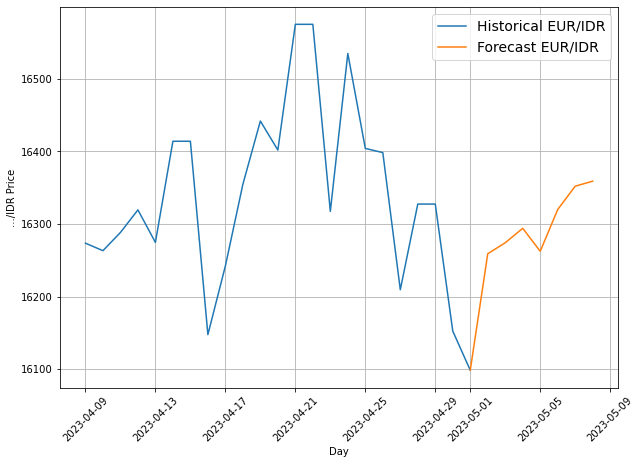

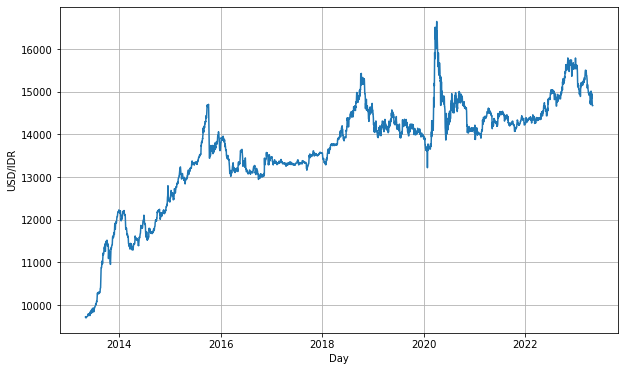

1/1 [==============================] - 0s 27ms/step


<ipython-input-15-e96c69490cdc>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


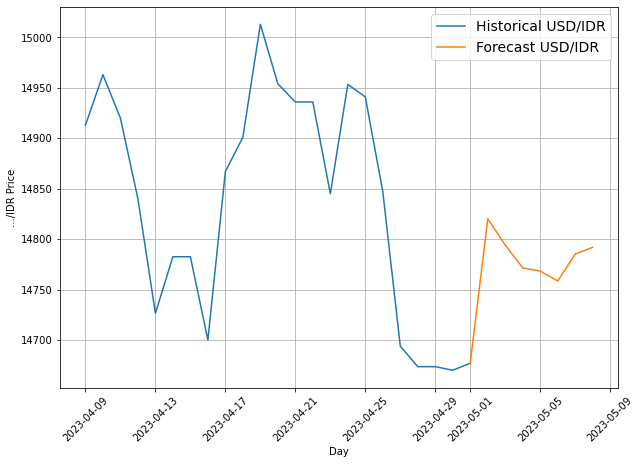

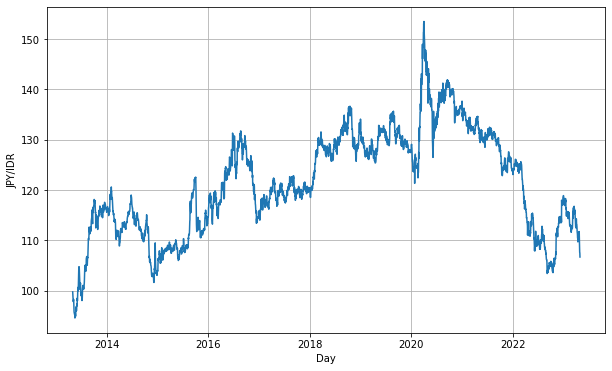

1/1 [==============================] - 0s 35ms/step


<ipython-input-15-e96c69490cdc>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


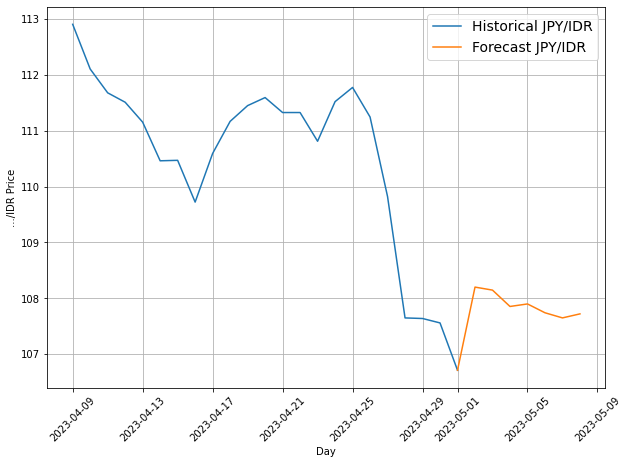

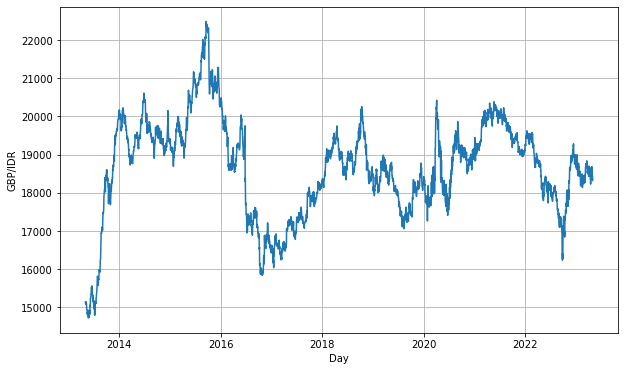

1/1 [==============================] - 0s 49ms/step


<ipython-input-15-e96c69490cdc>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


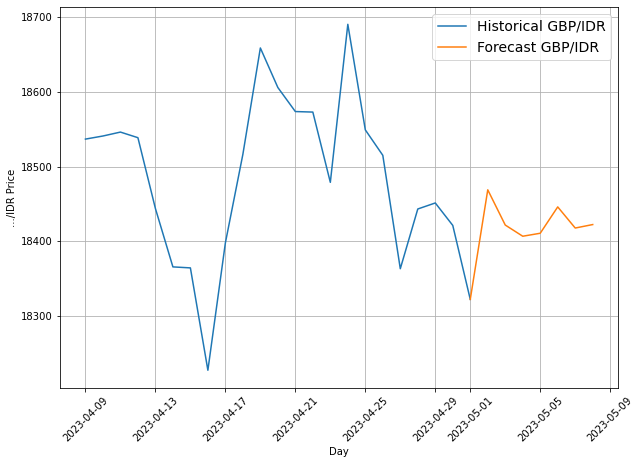

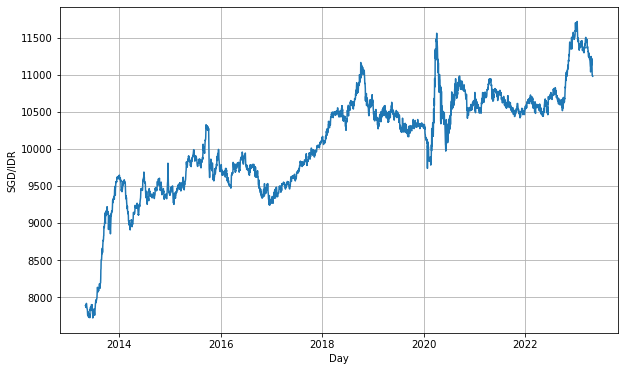

1/1 [==============================] - 0s 32ms/step


<ipython-input-15-e96c69490cdc>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


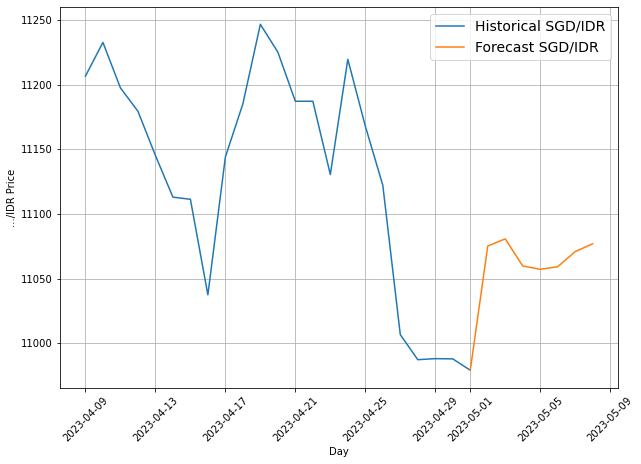

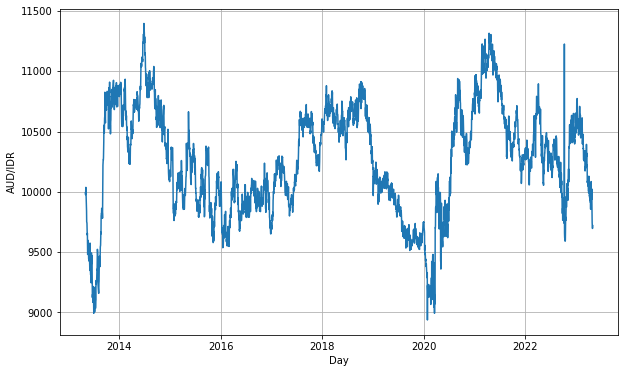

1/1 [==============================] - 0s 34ms/step


<ipython-input-15-e96c69490cdc>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


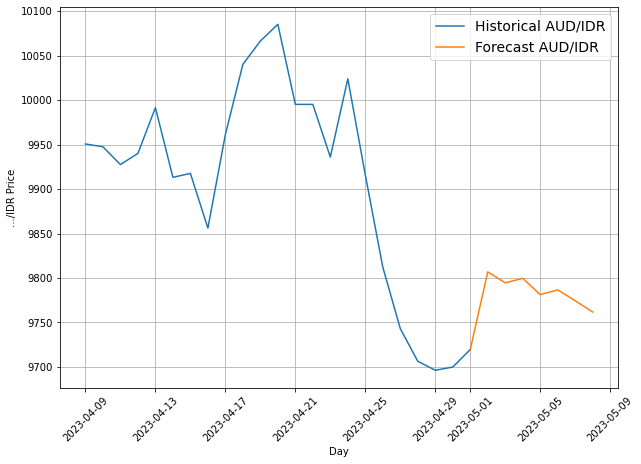

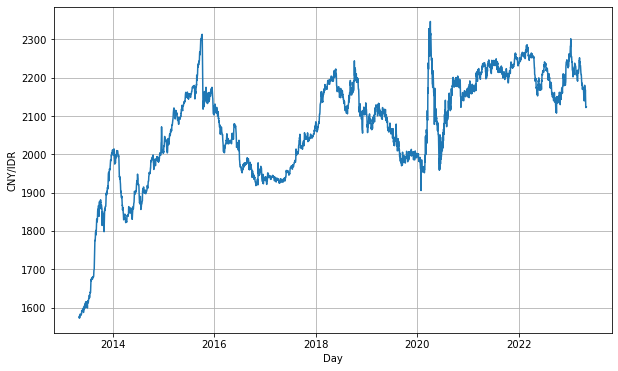

1/1 [==============================] - 0s 30ms/step


<ipython-input-15-e96c69490cdc>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


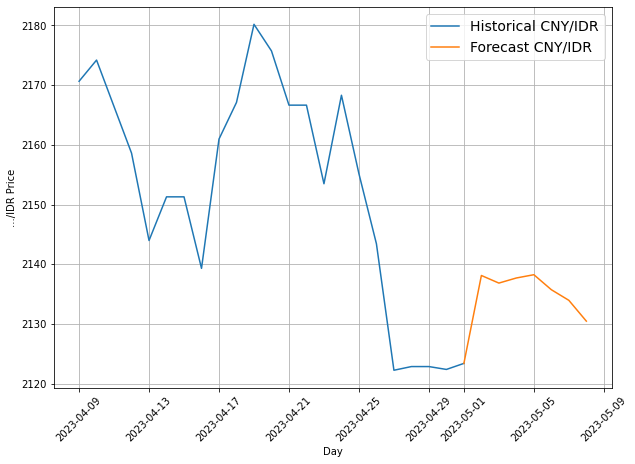

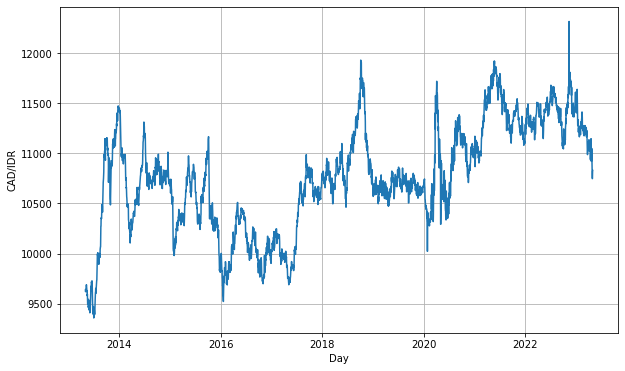

1/1 [==============================] - 0s 30ms/step


<ipython-input-15-e96c69490cdc>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


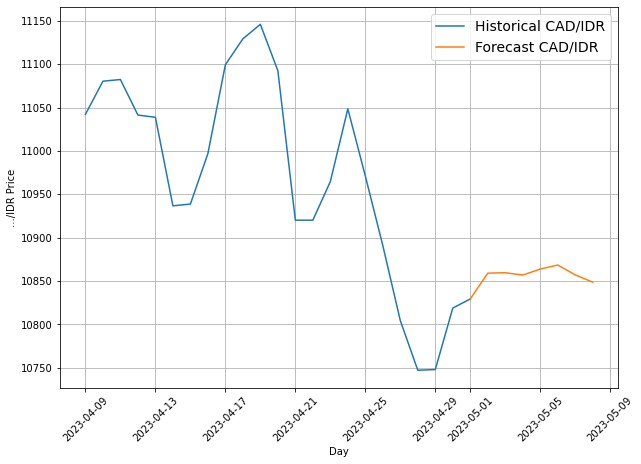

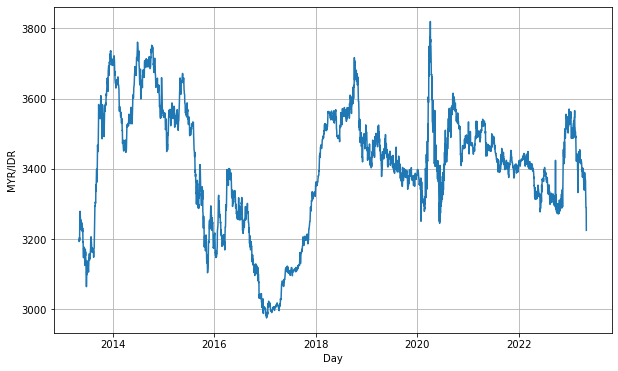

1/1 [==============================] - 0s 30ms/step


<ipython-input-15-e96c69490cdc>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


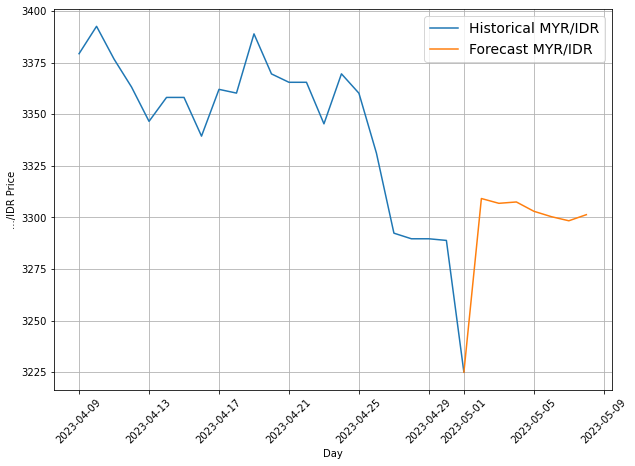

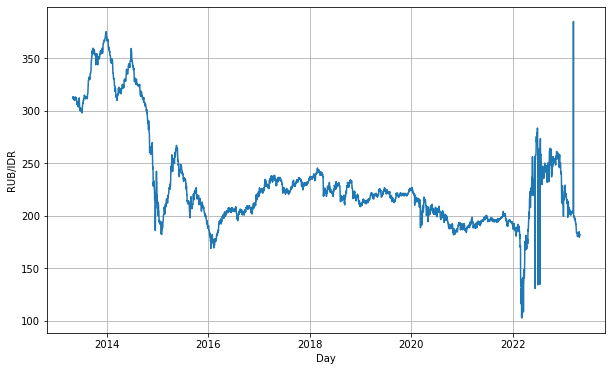

1/1 [==============================] - 0s 30ms/step


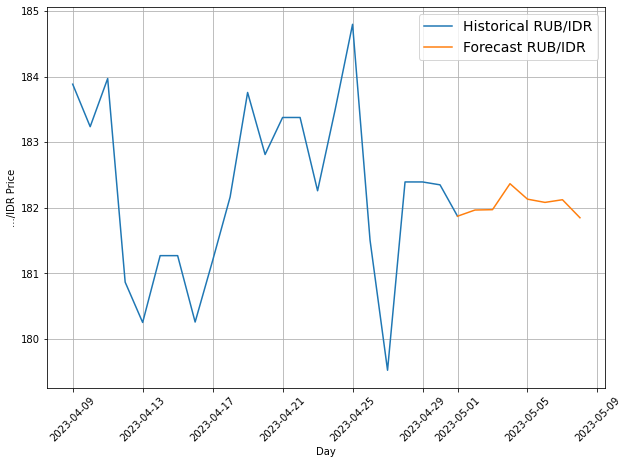

In [15]:
md = [1,2,3,4,5,6,7,8,9,10]
eva = []

for i, model_number in enumerate(md):
    series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
    
    currency = series.columns.tolist()
    
    series = series.iloc[:,i]
            
    time = series.index

    # Preview the data
    plot_series(time, series, xlabel='Day', ylabel=f'{currency[i]}/IDR')
    
    split_time = 3000

    x_train = series[:split_time]
    time_train = time[:split_time]

    x_valid = series[split_time:]
    time_valid = time[split_time:]

    window_size = 30
    batch_size = 128
    shuffle_buffer_size = 1000

    train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
    valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)
    
    model = tf.keras.models.load_model(f"saved_model/{model_number}/")
    model.evaluate(valid_set)

    into_future = 7
    future_forecast = make_future_forecast(values=series,
                                           model=model,
                                           into_future=into_future,
                                           window_size=window_size)
    
    next_time_steps = pd.date_range(start=time[-1], periods=into_future+1)

    future_forecast = np.insert(future_forecast, 0, series[-1])
    
    plt.figure(figsize=(10, 7))
    plot_time_series(time, series, start=3630, format="-", label=f"Historical {currency[i]}/IDR")
    plot_time_series(next_time_steps, future_forecast, format="-", label=f"Forecast {currency[i]}/IDR")

#     eval_model = evaluate_predss(y_true=series,
#                                    y_pred=future_forecast)
    
#     eva.append(eval_model)

In [ ]:
# # Create a dictionary using the "md" list as keys and the "eva" list as values
# eva_data = {str(m): e for m, e in zip(md, eva)}

# # Convert the dictionary into a DataFrame
# eva_results = pd.DataFrame.from_dict(eva_data, orient='index')

# # Add a column for the row names
# eva_results.index.name = 'md'

# eva_results